# **Use a neural network to classify images of clothing.**

https://www.tensorflow.org/tutorials/keras/classification/

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


Import the fashion MNIST dataset.
Contains 60 000 images to train the network and 10 000 images to test the network.

You can access the dataset directly from tensorflow.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four numpy arrays.
  - train_images and train_labels are the training set; the data the model uses to learn.
    - the model is tested against the test set, the test_images and test_labels arrays

The images are 28*28 numpy arrays with pixel values ranging from 0 to 255. The labels are an array of integers ranging from 0 to 9.

{0: T-shirt/ top, 1:Trouser,2:Pullover,3:Dress,4:Coat,5:Sandal,6:Shirt,7:Sneaker,8:Bag,9:Ankle Boot}

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle Boot']

# **Explore the data**

Explore the format of the dataset. The following shows there are 60 000 images in the training set with each image represented as 28*28 pixels

In [6]:
train_images.shape

(60000, 28, 28)

Check that there are 60 000 labels in the training set

In [6]:
len(train_labels)

60000

See that each label is an integer between 0 and 9

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# **Preprocess the data**

The data must be preprocessed before training the network. By inspevting the first image in the training set, you can see the pixel values fall in the range of 0 to 255

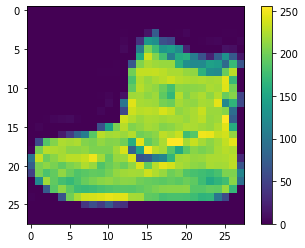

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Before being fed into a neural network the values must be scaled to a range between 0 and 1.
Therefore divide the values by 255.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255

Verify that the data is in the correct format. Display the first 25 images from the training set and display the class name below each image.

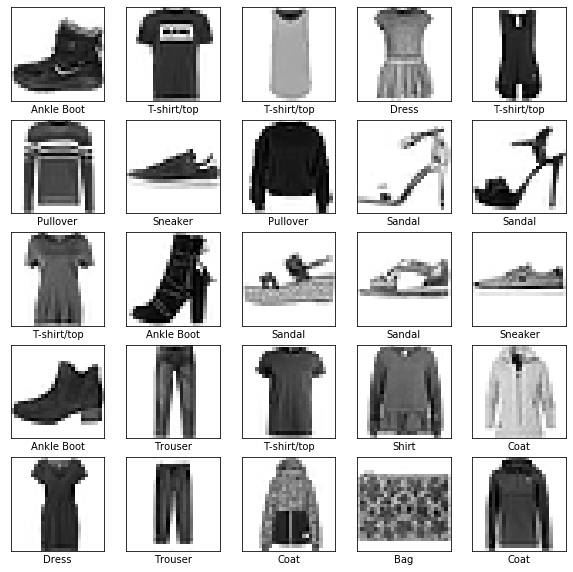

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# **Build the model**

**Set up the layers**

the basic building block of a neural network is the layer. Layers extarct representations from the data fed into them


Most of deep learning consists of chaining together simple layers. Most layers have parameters that are learned during training 

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


the first layer in this model transforms the format of the images from a 2 dimensional array (28*28) to a 1 dimensional array of 784 pixels.

The second layer is a fully connected neural layer with 128 nodes(neurons)

The third layer is a 10 node softmax layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the ten classes

# **Compile the model**


Before the model is ready for training we need to add a few more settings.
  - *loss function*: measures the accuracy of the model during training. We want minimise this function
  -*Optimizer*: how the model is updated based on the data it sees and its loss function.
  -*Metrics*: used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of images that are correctly classified.

In [0]:
model.compile(optimizer='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Train the model**
Training the neural network requires the following steps:
  - feed the training data to the model
  - model learns to associate images and     labels
  - ask the model to make predictions        about a test
  - verify that the predictions match        the labels from the test_labels array

**Feed the model**
call the model.fit method - fits the model to the training data

In [12]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.5009 - acc: 0.8239
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3727 - acc: 0.8663
Epoch 3/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3344 - acc: 0.8778
Epoch 4/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3131 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2929 - acc: 0.8920
Epoch 6/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2797 - acc: 0.8953
Epoch 7/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2678 - acc: 0.9007
Epoch 8/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2572 - acc: 0.9047
Epoch 9/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.2463 - acc: 0.9088
Epoch 10/10
60000/60000 [==============================] - 

This model reaches an accuracy of about 91%.

**Evaluate accuracy**
Compare how the model performs on the  test dataset

In [13]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels, verbose=2)

print('\nTest accuracy:', test_accuracy)

10000/10000 - 0s - loss: 0.3598 - acc: 0.8750

Test accuracy: 0.875


It turns out the accuracy on the test set is a little less than the accuracy on the training set. This gap represents overfitting.

This occurs when the model performs worse on new, previously unseen data.

An overfitted model memorizes the training data


# **Make predictions**

In [0]:
predictions = model.predict(test_images)

In [15]:
predictions[0]


array([6.1553618e-07, 3.9064561e-13, 2.3593019e-09, 3.3643800e-12,
       1.9388740e-09, 2.6290545e-03, 7.2946582e-09, 4.9786028e-03,
       1.0780776e-06, 9.9239069e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the models confidence that the image corresponds to each of the 10 different articles of cllothing.

You can see which label has the highest confidence value

In [16]:
np.argmax(predictions[0])

9

Therefore the model predicts that this image is an ankle boot.

check this with the test label

In [22]:
test_labels[0]

9

graph this to look at the full set of ten class predictions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# **Verify Predictions**

With the model trained, you can use it to make predictions about some images.

Looking at the 0th image, predictions and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage for the predicted label

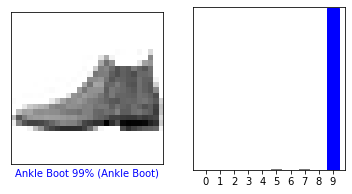

In [23]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i], test_labels)
plt.show()

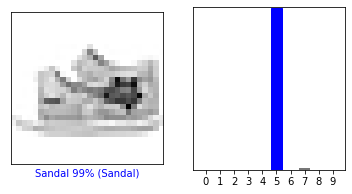

In [32]:
i = 9999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

Now plot several images with their predictions. Note the model can be wrong even when very confident.

Plot the first *n* test images, their predicted labels and the true labels. Color correct predictions in blue and incorrect predictions in red.

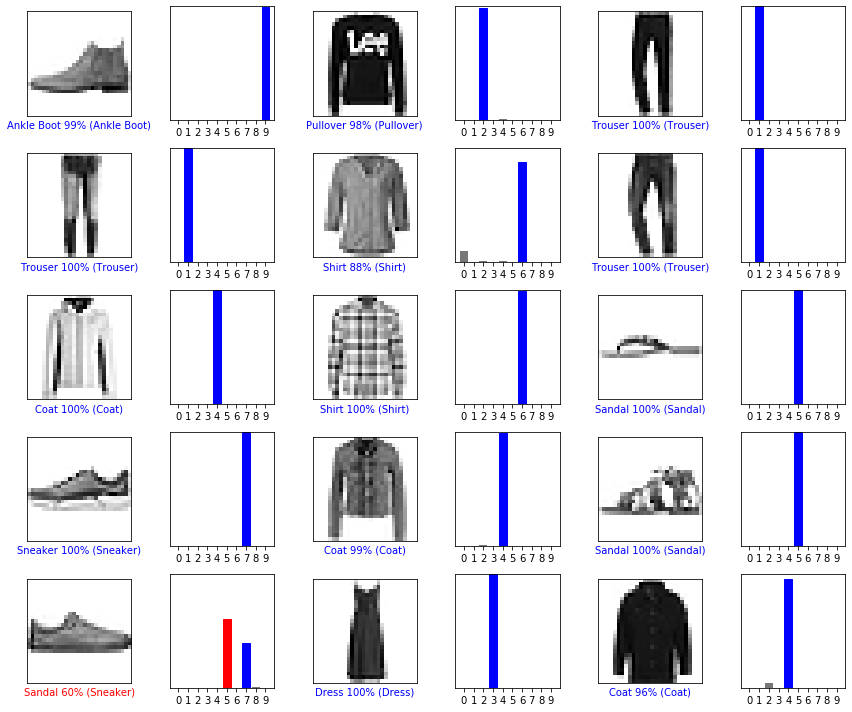

In [33]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Use the trained model**

Use the trained model to make a prediction about a single image

In [34]:
# grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras models are optimizwd to make predictions on a *batch* or collection of examples at once. Therefore if only using a single image it needs to be added to a list

In [35]:
# add the image to a batch where it is the only member

img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


now predict the correct label for this image

In [36]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.0770432e-05 9.8440535e-12 9.8207778e-01 9.0864360e-10 1.6027233e-02
  1.9528840e-10 1.8641981e-03 2.8881931e-16 6.8728363e-11 1.8743731e-14]]


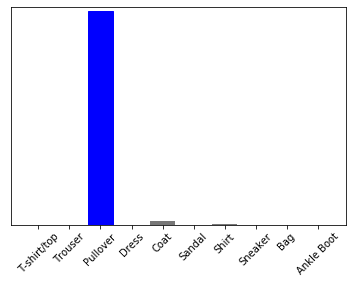

In [37]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one list for each image in the batch of data.
Grab the predictions for our (only) image in the batch.

In [38]:
np.argmax(predictions_single[0])

2